In [1]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

Using TensorFlow backend.


## Loading the dataset

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_test.shape

(10000, 1)

In [8]:
NUM_CLASSES=10

In [9]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

In [10]:
y_train=to_categorical(y_train,NUM_CLASSES)
y_test=to_categorical(y_test,NUM_CLASSES)

In [11]:
y_train.shape

(50000, 10)

In [12]:
y_test.shape

(10000, 10)

In [15]:
np.array([[[[[1,2],[2,3],[6,7]],[[8,9],[1,2],[4,1]]]],[[[[1,2],[2,3],[6,7]],[[8,9],[1,2],[4,1]]]],[[[[1,2],[2,3],[6,7]],[[8,9],[1,2],[4,1]]]]]).shape

(3, 1, 2, 3, 2)

In [16]:
x_train[27][21][20][1]

0.39607844

In [17]:
x_train[27,21,20,1]

0.39607844

In [18]:
x_train[54, 12, 13, 1]

0.36862746

In [25]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## Building the Model

In [30]:
# architecture
# using Functional API
from keras.layers import Input, Flatten,Dense
from keras.models import Model
input_layer= Input(shape=(32,32,3))
x=Flatten()(input_layer)
x=Dense(units=200,activation='relu')(x)
x=Dense(units=150,activation='relu')(x)
output_layer=Dense(units=10,activation='softmax')(x)
model=Model(input_layer,output_layer)

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_10 (Dense)             (None, 150)               30150     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [32]:
# compiling the model
from keras.optimizers import Adam
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [33]:
# training the model
model.fit(x_train,y_train,batch_size=256,epochs=10,shuffle=True)

Epoch 1/10
50000/50000 [==============================] - 4s 84us/step - loss: 1.9006 - acc: 0.3186
Epoch 2/10
50000/50000 [==============================] - 4s 80us/step - loss: 1.7156 - acc: 0.3945: 2s - loss: 1.7448 - ETA: 1s - lo
Epoch 3/10
50000/50000 [==============================] - 4s 88us/step - loss: 1.6301 - acc: 0.4240
Epoch 4/10
50000/50000 [==============================] - 5s 93us/step - loss: 1.5808 - acc: 0.4407
Epoch 5/10
50000/50000 [==============================] - 4s 81us/step - loss: 1.5373 - acc: 0.4568
Epoch 6/10
50000/50000 [==============================] - 4s 79us/step - loss: 1.5039 - acc: 0.4681
Epoch 7/10
50000/50000 [==============================] - 4s 87us/step - loss: 1.4810 - acc: 0.4756
Epoch 8/10
50000/50000 [==============================] - 5s 92us/step - loss: 1.4530 - acc: 0.4858
Epoch 9/10
50000/50000 [==============================] - 4s 80us/step - loss: 1.4262 - acc: 0.4950
Epoch 10/10
50000/50000 [==============================] - 4s 81us

In [34]:
# evaluating the model
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 72us/step


[1.470635634803772, 0.4702]

In [35]:
# prediction
CLASSES= np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])
preds=model.predict(x_test)
preds_single=CLASSES[np.argmax(preds,axis=-1)]
actual_single=CLASSES[np.argmax(y_test,axis=-1)]

In [36]:
preds_single

array(['cat', 'truck', 'ship', ..., 'cat', 'dog', 'horse'], dtype='<U10')

In [37]:
actual_single

array(['cat', 'ship', 'ship', ..., 'dog', 'automobile', 'horse'],
      dtype='<U10')

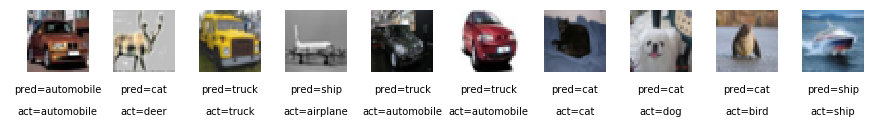

In [40]:
#plot
import matplotlib.pyplot as plt
n_to_show=10
indices=np.random.choice(range(len(x_test)),n_to_show)
fig=plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4,wspace=0.4)
for i,idx in enumerate(indices):
    img=x_test[idx]
    ax=fig.add_subplot(1,n_to_show,i+1)
    ax.axis('off')
    ax.text(0.5,-0.35,'pred='+str(preds_single[idx]),fontsize=10,ha='center',transform=ax.transAxes)
    ax.text(0.5,-0.7,'act='+str(actual_single[idx]),fontsize=10,ha='center',transform=ax.transAxes)
    ax.imshow(img)

## Improving the model

In [42]:
from keras.layers import Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
input_layer=Input(shape=(32,32,3))
x=Conv2D(filters=32,kernel_size=3,strides=1,padding='same')(input_layer)
x=BatchNormalization()(x)
x=LeakyReLU()(x)
x=Conv2D(filters=32,kernel_size=3,strides=2,padding='same')(x)
x=BatchNormalization()(x)
x=LeakyReLU()(x)
x=Conv2D(filters=64,kernel_size=3,strides=1,padding='same')(x)
x=BatchNormalization()(x)
x=LeakyReLU()(x)
x=Conv2D(filters=64,kernel_size=3,strides=2,padding='same')(x)
x=BatchNormalization()(x)
x=LeakyReLU()(x)
x=Flatten()(x)
x=Dense(128)(x)
x=BatchNormalization()(x)
x=LeakyReLU()(x)
x=Dropout(rate=0.5)(x)
x=Dense(NUM_CLASSES)(x)
output_layer=Activation('softmax')(x)
model=Model(input_layer,output_layer)

W0528 14:54:16.112307 18012 deprecation_wrapper.py:119] From C:\Users\ankit19.gupta\ankit\ankit\ML_Code\GenerativeDeepLearning\myenv\lib\site-packages\keras\backend\tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0528 14:54:16.804731 18012 deprecation.py:506] From C:\Users\ankit19.gupta\ankit\ankit\ML_Code\GenerativeDeepLearning\myenv\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 32)        0         
__________

In [44]:
# compiling the model
from keras.optimizers import Adam
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [45]:
# training the model
model.fit(x_train,y_train,batch_size=256,epochs=10,shuffle=True)

Epoch 1/10
50000/50000 [==============================] - 386s 8ms/step - loss: 1.7004 - acc: 0.4164
Epoch 2/10
50000/50000 [==============================] - 232s 5ms/step - loss: 1.2666 - acc: 0.5504
Epoch 3/10
50000/50000 [==============================] - 200s 4ms/step - loss: 1.0962 - acc: 0.6130
Epoch 4/10
50000/50000 [==============================] - 198s 4ms/step - loss: 0.9814 - acc: 0.6531
Epoch 5/10
50000/50000 [==============================] - 199s 4ms/step - loss: 0.9105 - acc: 0.6812
Epoch 6/10
50000/50000 [==============================] - 191s 4ms/step - loss: 0.8478 - acc: 0.7049
Epoch 7/10
50000/50000 [==============================] - 195s 4ms/step - loss: 0.7972 - acc: 0.7212
Epoch 8/10
50000/50000 [==============================] - 195s 4ms/step - loss: 0.7483 - acc: 0.7381
Epoch 9/10
50000/50000 [==============================] - 199s 4ms/step - loss: 0.7101 - acc: 0.7493
Epoch 10/10
50000/50000 [==============================] - 197s 4ms/step - loss: 0.6690 - a

In [46]:
model.evaluate(x_test,y_test,batch_size=1000)

10000/10000 [==============================] - 10s 986us/step


[0.9757179856300354, 0.669099998474121]

In [ ]:
# prediction
CLASSES= np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])
preds=model.predict(x_test)
preds_single=CLASSES[np.argmax(preds,axis=-1)]
actual_single=CLASSES[np.argmax(y_test,axis=-1)]

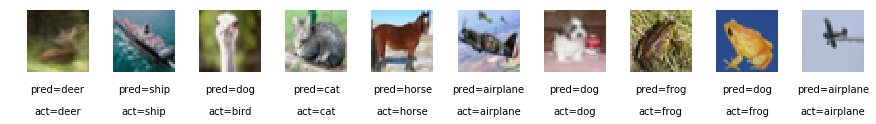

In [47]:
#plot
import matplotlib.pyplot as plt
n_to_show=10
indices=np.random.choice(range(len(x_test)),n_to_show)
fig=plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4,wspace=0.4)
for i,idx in enumerate(indices):
    img=x_test[idx]
    ax=fig.add_subplot(1,n_to_show,i+1)
    ax.axis('off')
    ax.text(0.5,-0.35,'pred='+str(preds_single[idx]),fontsize=10,ha='center',transform=ax.transAxes)
    ax.text(0.5,-0.7,'act='+str(actual_single[idx]),fontsize=10,ha='center',transform=ax.transAxes)
    ax.imshow(img)